# Problem set 2: Descriptive economics

**Learning goals:**

- Using basic `pandas` DataFrame operations
- Clean and structure data
- Download real economic datasets using an API
- Merge and join data sets
- Compute summary statistics

**Table of contents**<a id='toc0_'></a>    
- 1. [Basic pandas](#toc1_)    
  - 1.1. [Dataframe](#toc1_1_)    
  - 1.2. [New variable](#toc1_2_)    
  - 1.3. [Indexing](#toc1_3_)    
  - 1.4. [Changing variables](#toc1_4_)    
  - 1.5. [Dropping observations and columns](#toc1_5_)    
  - 1.6. [Renaming](#toc1_6_)    
  - 1.7. [Income distribution](#toc1_7_)    
- 2. [National account identity](#toc2_)    
  - 2.1. [Download](#toc2_1_)    
  - 2.2. [Merge](#toc2_2_)    
  - 2.3. [Split-apply-combine-plot](#toc2_3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

**Plan:**

A1_1 to A1_7: 1st hour.

A2_1: 2nd hour.

A2_2 to A2_3: 3rd hour.

**Tips:**

**Copy** a DataFrame to ensure you do not modify the original data.

**Masks** are used to filter data in a DataFrame based on specific conditions. A mask is essentially a boolean array that indicates whether each element in the DataFrame meets the condition (True) or not (False). When you apply this mask to the DataFrame, it returns only the rows where the condition is True.

**loc** and **iloc** are used to access specific rows and columns in a DataFrame. **loc** is label-based, meaning you use the actual labels of the rows and columns to select data. **iloc** is integer position-based, meaning you use the integer index positions to select data.

**Masks** work with both **loc** and **iloc**, but they are typically used with **loc** because masks are usually based on the actual data values (labels) rather than their integer positions.

**Groupby** is used to group data based on one or more columns and then perform aggregate functions (like sum, mean, count, etc.) on those groups.

**Renaming columns** can be done using the **rename** method. 

**Renaming rows** can be done using the **replace** method.

**Merging** combines two DataFrames based on a common column or index.

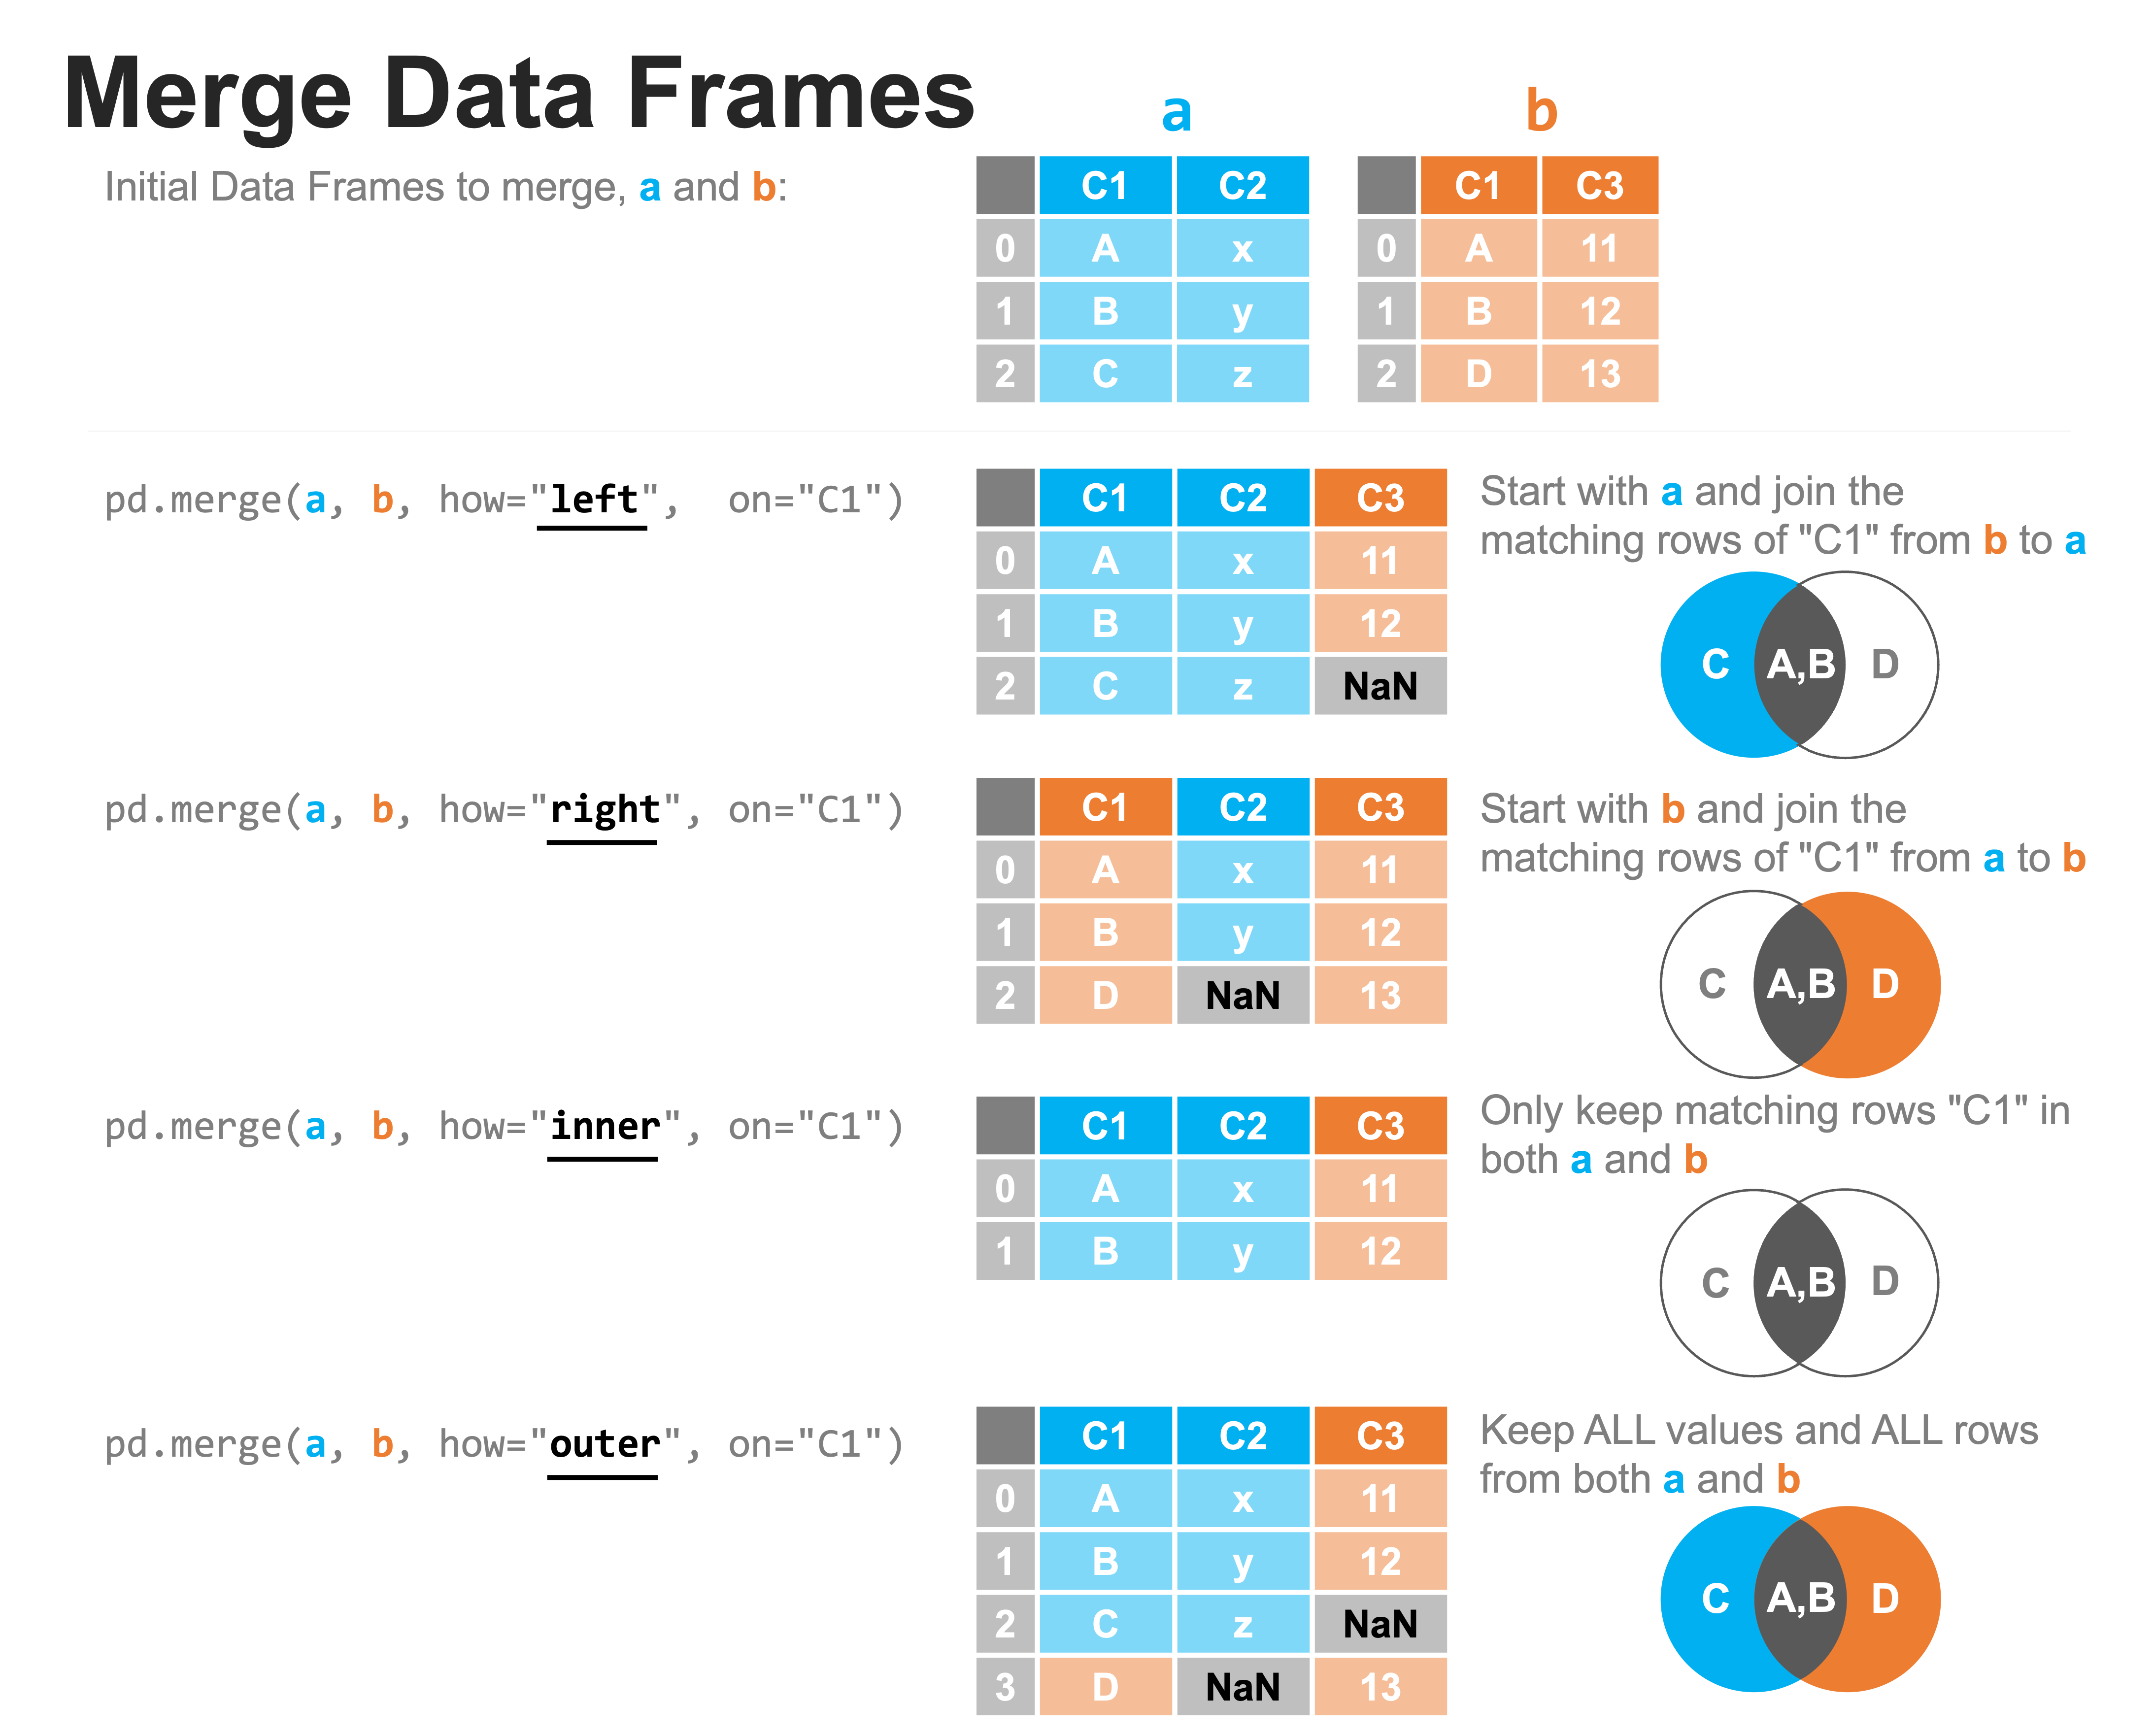

Modules

In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt
plt.rcParams.update({'axes.grid':True,'grid.color':'black','grid.alpha':'0.25','grid.linestyle':'--'})
plt.rcParams.update({'font.size': 14})

# install with: !pip install "git+https://github.com/alemartinello/dstapi`
!pip install "git+https://github.com/alemartinello/dstapi"

from dstapi import DstApi 

## 1. <a id='toc1_'></a>[Basic pandas](#toc0_)

### 1.1. <a id='toc1_1_'></a>[Dataframe](#toc0_)

Modify the code below such that *income* and *consumption* are variables in the *df* DataFrame.

In [ ]:
# Jeppe sets a random seed for reproducibility
np.random.seed(1999)
 
# And creates some fake data
N = 100
mydata = {}
mydata['id'] = range(N)
income = np.exp(np.random.normal(size=N)) # Picks the random pseudo-random numbers the same way each time due to the seed
consumption = np.sqrt(income)

# We'll add income and consumption to the data dictionary
mydata['income'] = income

# Add consumption to the data dictionary like above
? 

# We create a pandas DataFrame
df = pd.DataFrame(mydata)

# Display the first five rows using head()
?

,id,income,consumption
0,0,0.727981,0.853218
1,1,1.997831,1.413447
2,2,0.276823,0.526140
3,3,1.481931,1.217346
4,4,1.235904,1.111712


Important! Create a copy of the DataFrame called *df_true* before you start modifying it. We will use the original DataFrame later.

In [ ]:
# Create a copy of the original dataframe to not overwrite it
# Name the copy df_true
?

In [4]:
# Display the whole dataframe
display(df_true)

,id,income,consumption
0,0,0.727981,0.853218
1,1,1.997831,1.413447
2,2,0.276823,0.526140
3,3,1.481931,1.217346
4,4,1.235904,1.111712
...,...,...,...
95,95,0.201856,0.449284
96,96,2.368034,1.538842
97,97,2.389874,1.545922
98,98,1.488635,1.220096


### 1.2. <a id='toc1_2_'></a>[New variable](#toc0_)

Create a new variable *ratio* which is the ratio of consumption to income.

In [ ]:
# We create the new variable and add it to the dataframe in one go by defining a new column
df_true["ratio"] = ? / df["income"]

# Show the first five rows again to see the new variable
df_true.head()

,id,income,consumption,ratio
0,0,0.727981,0.853218,1.172033
1,1,1.997831,1.413447,0.707490
2,2,0.276823,0.526140,1.900636
3,3,1.481931,1.217346,0.821459
4,4,1.235904,1.111712,0.899513


### 1.3. <a id='toc1_3_'></a>[Indexing](#toc0_)

**Question a:** Select everybody: with an income above 1.

In [ ]:
# Create a mask for income > 1
mask = df_true["income"] > ?

# We use the mask to filter the dataframe and display the result using head
df_true.loc[mask, :].head()

,id,income,consumption,ratio
1,1,1.997831,1.413447,0.707490
3,3,1.481931,1.217346,0.821459
4,4,1.235904,1.111712,0.899513
6,6,2.574032,1.604379,0.623294
7,7,2.475478,1.573365,0.635580


**Question b:** Select everybody with an income *above* 1 and a ratio *above* 0.7.

In [ ]:
# We create another mask for income above 1 and ratio above 0.7
mask = ((df_true["income"] > 1) & (df_true["ratio"] > 0.7))

# Use the mask to filter the dataframe and display the result using head as before
?

,id,income,consumption,ratio
1,1,1.997831,1.413447,0.707490
3,3,1.481931,1.217346,0.821459
4,4,1.235904,1.111712,0.899513
11,11,2.031708,1.425380,0.701567
18,18,1.280235,1.131475,0.883802


### 1.4. <a id='toc1_4_'></a>[Changing variables](#toc0_)

**Question a:** Set consumption equal to 0.5 if income is less than 0.5.

In [ ]:
# Create a mask for income < 0.5
mask = ?

# We use the mask to set consumption to 0.5 for all rows where the mask is true
df_true.loc[mask, "consumption"] = 0.5 # Interpretation: For all rows in the column "consumption" where the mask is true, set the value to 0.5

# Print the mean of consumption with and without mask
print("Mean of consumption with mask: ", df_true['consumption'].mean()) # <- With mask
print("Mean of consumption without mask: ", df['consumption'].mean()) # <- Without mask

Mean of consumption with mask:  1.075479712048503
Mean of consumption without mask:  1.0878444061731818


**Question b:** Set consumption equal to income if income is less than 0.5.

In [ ]:
# We create a mask for income < 0.5
mask = df_true["income"] < 0.5

# Use the mask to set consumption to income if the mask is true
df_true.loc[mask, "consumption"] = ? # Interpretation: For all rows in the column "consumption" where the mask is true, set the value to the value in the column "income"

# Print the mean of consumption with and without mask
print("Mean of consumption with mask: ", df_true['consumption'].mean()) # <- With mask
print("Mean of consumption without mask: ", df['consumption'].mean()) # <- Without mask

Mean of consumption with mask:  1.0337728690050054
Mean of consumption without mask:  1.0878444061731818


### 1.5. <a id='toc1_5_'></a>[Dropping observations and columns](#toc0_)

Drop the *ratio* variable and all rows with an income above 1.5. After this, also drop the first 5 rows.

**Why do we call df_true = df_true[mask] instead of just df_true[mask]?**

In [ ]:
print(f'before: {df_true.shape[0]} observations, {df_true.shape[1]} variables')
# Our code

# Lets start by dropping the ratio column
df_true = df_true.drop(columns=['ratio'])

# Now we drop all rows with income > 1.5 - same as only keeping rows with income <= 1.5

# Mask for income <= 1.5
mask = df_true['income'] <= 1.5

# Apply the mask to the dataframe
df_true = df_true[mask]

# Drop the first five rows
df_true = df_true.iloc[?:, :] # Use iloc to select rows by index position and loc to select rows by label

print(f'after: {df_true.shape[0]} observations, {df_true.shape[1]} variables')

before: 100 observations, 4 variables
after: 65 observations, 3 variables


### 1.6. <a id='toc1_6_'></a>[Renaming](#toc0_)

Rename *consumption* to *cons* and *income* to *inc*.

In [ ]:
# Rename the columns to shorter names
df_true = df_true.rename(columns={'income': 'inc', ?})

### 1.7. <a id='toc1_7_'></a>[Income distribution](#toc0_)

Compute the share of income for each decile of the income distribution using the code below as a starting point.

In [ ]:
# Find the income deciles
deciles = df_true.quantile([0.1 * i for i in range(1, 10)])

# Create a new column 'decile' that assigns each observation to a decile
df_true['decile'] = pd.qcut(
    df_true['inc'],
    q=10,               # 10 equal-sized groups (deciles)
    labels=range(1, 11) # Label them 1–10
)
# ^ I use ChatGPT for this!

# Compute each decile's share of total income
income_share = df_true.groupby('decile', observed=False)['inc'].sum() / df_true['inc'].sum()

# Display the income share of each decile
?

decile
1     0.024775
2     0.039289
3     0.061514
4     0.063729
5     0.089852
6     0.098559
7     0.114818
8     0.148799
9     0.149963
10    0.208702
Name: inc, dtype: float64

## 2. <a id='toc2_'></a>[National account identity](#toc0_)

### 2.1. <a id='toc2_1_'></a>[Download](#toc0_)

Consider the following dictionary definitions:

In [13]:
columns_dict = {} # Create dictionary to hold old and new column names
columns_dict['TRANSAKT'] = 'variable'
columns_dict['PRISENHED'] = 'unit'
columns_dict['TID'] = 'year'
columns_dict['INDHOLD'] = 'value'

var_dict = {} # var is for variable
var_dict['P.1 Output'] = 'Y'
var_dict['P.3 Final consumption expenditure'] = 'C'
var_dict['P.3 Government consumption expenditure'] = 'G'
var_dict['P.5 Gross capital formation'] = 'I'
var_dict['P.6 Export of goods and services'] = 'X'
var_dict['P.7 Import of goods and services'] = 'M'

unit_dict = {}
unit_dict['2020-prices, chained values'] = 'real'
unit_dict['Current prices'] = 'nominal'

**Step 1:** Download all of table `nah1`.

**Understand this code!**

In [14]:
# Create an instance of the DstApi class for the NAH1 dataset
nah1_api = DstApi('nah1') 

# Get the base parameters for the API call
params = nah1_api._define_base_params(language='en')

# Display the base parameters
display(params)

# Get the data from the API with the specified parameters
nah1 = nah1_api.get_data(params)

# Create a copy of the original dataframe to not overwrite it
nah1_true = nah1.copy()

{'table': 'nah1',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'TRANSAKT', 'values': ['*']},
  {'code': 'PRISENHED', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [ ]:
# Show head of the dataframe
?

,TRANSAKT,PRISENHED,TID,INDHOLD
0,D.21 Taxes on products,"2020-prices, chained values",1992,190426
1,D.21 Taxes on products,Current prices,1992,134646
2,D.21-D.31 Taxes less subsidies on products,"2020-prices, chained values",1992,178691
3,D.21-D.31 Taxes less subsidies on products,Current prices,1992,119558
4,D.31 Subsidies on products,"2020-prices, chained values",1992,12676


**Step 2:** Rename the columns using `columns_dict` and replace data using `var_dict` and `unit_dict`.

In [ ]:
# Rename the columns TRANSAKT, PRISENHED, TID, INDHOLD to variable, unit, year, value
?
# Rename the variables in the column rows using var_dict
nah1_true['variable'] = nah1_true['variable'].replace(var_dict)

# Rename the units in the column rows using unit_dict
?

# Show the first 10 rows of the dataframe to see the changes
nah1_true.head(?)

,variable,unit,year,value
0,D.21 Taxes on products,real,1992,190426
1,D.21 Taxes on products,nominal,1992,134646
2,D.21-D.31 Taxes less subsidies on products,real,1992,178691
3,D.21-D.31 Taxes less subsidies on products,nominal,1992,119558
4,D.31 Subsidies on products,real,1992,12676
5,D.31 Subsidies on products,nominal,1992,15089
6,Y,real,1992,2318766
7,Y,nominal,1992,1489382
8,P.11+P.12+P.131 Market output and output for o...,real,1992,..
9,P.11+P.12+P.131 Market output and output for o...,nominal,1992,..


**Step 3:** Only keep rows where the variable is in `[Y, C, G, I, X, M]`. Afterwards convert the `value` column to a float.

In [ ]:
# Keep rows where variable is in var_dict values
mask = nah1_true['variable'].isin(?)
nah1_true = nah1_true[mask]

# Convert the value column to float - meaning numbers with decimals
nah1_true['value'] = nah1_true['value'].astype(?)

# Show the first five rows to see the changes
?

,variable,unit,year,value
6,Y,real,1992,2318766.0
7,Y,nominal,1992,1489382.0
22,C,real,1992,1077013.0
23,C,nominal,1992,684847.0
24,G,real,1992,369532.0


**Step 4:** Discuss what the following summary statistics show.

In [18]:
# Show summary statistics for each variable and unit combination - real and nominal
nah1_true.groupby(['variable','unit']).describe()

year                                                     \
                 count    mean        std     min     25%     50%     75%   
variable unit                                                               
C        nominal  59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   
         real     59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   
G        nominal  59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   
         real     59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   
I        nominal  59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   
         real     59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   
M        nominal  59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   
         real     59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   
X        nominal  59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   
         real     59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   
Y        nominal  59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   
         real     59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   

                         value                                         \
                     max count          mean           std        min   
variable unit                                                           
C        nominal  2024.0  59.0  8.461741e+05  5.652188e+05    62576.0   
         real     2024.0  59.0  1.189017e+06  3.326502e+05   587078.0   
G        nominal  2024.0  59.0  2.863408e+05  1.984273e+05    14768.0   
         real     2024.0  59.0  4.202840e+05  1.197782e+05   189310.0   
I        nominal  2024.0  59.0  2.525195e+05  1.846182e+05    21134.0   
         real     2024.0  59.0  3.208853e+05  1.354669e+05   137948.0   
M        nominal  2024.0  59.0  5.163237e+05  4.683027e+05    24406.0   
         real     2024.0  59.0  5.583922e+05  3.864176e+05   116721.0   
X        nominal  2024.0  59.0  5.802952e+05  5.353158e+05    23110.0   
         real     2024.0  59.0  6.657858e+05  4.411102e+05   129917.0   
Y        nominal  2024.0  59.0  2.007044e+06  1.465046e+06   144582.0   
         real     2024.0  59.0  2.704755e+06  9.933861e+05  1214124.0   

                                                              
                        25%        50%        75%        max  
variable unit                                                 
C        nominal   338655.0   772989.0  1343689.5  1947969.0  
         real      922289.0  1160977.0  1494856.0  1755213.0  
G        nominal   112034.5   249320.0   486655.5   672154.0  
         real      345416.5   401675.0   543117.5   604346.0  
I        nominal    83003.0   213795.0   369267.0   701509.0  
         real      201830.5   294707.0   408268.5   634575.0  
M        nominal   142456.0   331225.0   867015.5  1778459.0  
         real      225218.5   404314.0   891169.0  1424070.0  
X        nominal   144654.0   380037.0   946940.5  2078142.0  
         real      275983.5   529614.0  1042024.0  1697515.0  
Y        nominal   714095.5  1685585.0  3196822.0  5326389.0  
         real     1802968.5  2547923.0  3591186.0  4552586.0

**Step 5:** Sort the dataset by year

In [ ]:
# Sort by year - automatically ascending (True) - meaning from oldest to newest
nah1_true = nah1_true.?

# Show the first five rows
?

,variable,unit,year,value
1970,M,real,1966,116721.0
1964,X,real,1966,129917.0
1955,I,nominal,1966,21134.0
1954,I,real,1966,137948.0
1945,G,nominal,1966,14768.0


### 2.2. <a id='toc2_2_'></a>[Merge](#toc0_)

Load population data from Denmark Statistics:

In [ ]:
# Create an instance of the DstApi class for the BEFOLK1 dataset
BEFOLK1_api = ?

# Get the base parameters for the API call
params = BEFOLK1_api._define_base_params(language='en')

# Display the parameters
display(params)

{'table': 'befolk1',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'KØN', 'values': ['*']},
  {'code': 'ALDER', 'values': ['*']},
  {'code': 'CIVILSTAND', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [21]:
# Display the variables for KØN and CIVILSTAND
for code in ['KØN','CIVILSTAND']: # Calls on the variables for each code in the list
    print(code) # Print the code
    display(BEFOLK1_api.variable_levels(code,language='en')) # Display the variable for the code
    print('') # Print a blank line for better readability

KØN


,id,text
0,TOT,I alt
1,1,Mænd
2,2,Kvinder



CIVILSTAND


,id,text
0,TOT,I alt
1,U,Ugift
2,G,Gift/separeret
3,E,Enke/enkemand
4,F,Fraskilt


In [ ]:
# KØN - Total 
params['variables'][0]['values'] = ['TOT'] 

# CIVILSTAND - Total
params['variables'][2]['values'] = ['TOT'] # Why 0 and 2? Because they are the first and third variables in the list of variables in the params dictionary

# Get the data from the API with the specified parameters
BEFOLK1 = BEFOLK1_api.get_data(params=?) 

# Display the first five rows of the dataframe
display(BEFOLK1.head()) 

,KØN,ALDER,CIVILSTAND,TID,INDHOLD
0,Total,"Age, total",Total,1999,5313577
1,Total,0 years,Total,1999,66205
2,Total,1 year,Total,1999,67983
3,Total,10 years,Total,1999,61241
4,Total,11 years,Total,1999,58580


In [ ]:
# Rename the columns TID and INDHOLD to year and population
BEFOLK1 = BEFOLK1.rename(columns={?})

# Drop the columns KØN and CIVILSTAND (since they are totals)
BEFOLK1 = BEFOLK1.drop(columns=[?])

# Create a new dataframe pop that only contains rows where ALDER is 'Age, total' and drop the ALDER column
pop = BEFOLK1[BEFOLK1.ALDER == 'Age, total'].drop(columns=['ALDER'])

# Show the first five rows
?

,year,population
0,1999,5313577
101,2018,5781190
202,1972,4975653
303,2008,5475791
404,1973,5007538


**Question a:** Merge the population and the national account data, so there is a new column called `population`. Use the **merge function**.

In [ ]:
# Use a left merge to combine the two dataframe on the year column, keeping all rows from nah1_true
merged_true = pd.merge(nah1_true, pop, how='left', on=['year']) # Play around with how='inner', 'right', 'outer' to see the difference

# Display the whole dataframe
merged_true

,variable,unit,year,value,population
698,I,nominal,2024,679226.0,5961249.0
699,I,real,2024,584627.0,5961249.0
700,G,nominal,2024,672154.0,5961249.0
701,C,nominal,2024,1947969.0,5961249.0
702,M,nominal,2024,1778459.0,5961249.0
703,C,real,2024,1704543.0,5961249.0
704,Y,nominal,2024,5326389.0,5961249.0
705,Y,real,2024,4552586.0,5961249.0
706,G,real,2024,597071.0,5961249.0
707,M,real,2024,1424070.0,5961249.0


**Question b:** Merge the population on again, so there is a new column called `population_alt`. Use the **join method**.

**Jonas comment:** Don't merge on index unless you absolutely have to. Instead, consider using a common column for merging to avoid potential issues with index alignment.

In [ ]:
# Set pop index to year
pop_with_index = pop.set_index('year')

# Rename population column to population_alt to avoid confusion
pop_with_index = pop_with_index.rename(columns={?})

# Set merged_true index to year
merged_true_with_index = merged_true.set_index(?)

# Join the two dataframes on the index (year)
merged_true_alt = merged_true_with_index.join(pop_with_index)

# Show a random sample of ten rows
merged_true_alt.? # We get two population columns now

,variable,unit,value,population,population_alt
year,,,,,
2008,X,nominal,976723.0,5475791.0,5475791.0
1996,X,real,554243.0,5251027.0,5251027.0
1987,M,real,289555.0,5124794.0,5124794.0
2010,C,nominal,1366634.0,5534738.0,5534738.0
2008,Y,nominal,3271109.0,5475791.0,5475791.0
1976,I,real,203858.0,5065313.0,5065313.0
1980,G,nominal,105298.0,5122065.0,5122065.0
1973,Y,real,1598195.0,5007538.0,5007538.0
2005,I,nominal,352541.0,5411405.0,5411405.0


**Question c:** Plot GDP per capita and GDP per working-age (18-65) using the code below as a starting point.

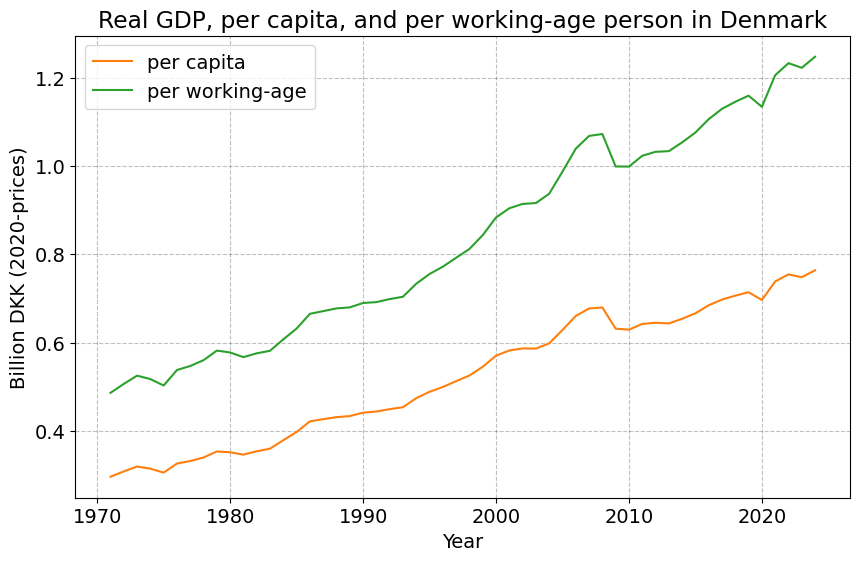

In [ ]:
# Use list comprehension to create a list of ages from 18 to 64 inclusive
ages = [f'{age} years' for age in range(18,65+1)]

# Only keep rows where ALDER is in the ages list and group by year, and sum the population
working_pop = BEFOLK1[BEFOLK1.ALDER.isin(?)].groupby('year').sum()

# Drop the ALDER column
working_pop = working_pop.drop(columns=['ALDER'])

# Rename population column to working_population
working_pop = working_pop.rename(columns={?})

# Merge the working population with nah1_true how = 'left' on='year'
merged_true = pd.merge(?)

# Merge the total population with the main dataframe
merged_true = pd.merge(merged_true, pop, how='left', on=['year'])

# Calculate GDP per capita and add it to the dataframe
merged_true['value_pop'] = merged_true.value/merged_true.population
merged_true['value_working_pop'] = merged_true.value/merged_true.working_population

# Set masks for real GDP
I = merged_true.unit == 'real' 
I &= merged_true.variable == 'Y' 

# Filter the dataframe for real GDP
merged_true = merged_true[I].set_index('year')

# Create plot of real GDP, real GDP per capita, and real GDP per working-age person - Use ChatGPT for this
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.set_title('Real GDP, per capita, and per working-age person in Denmark')
ax.set_ylabel('Billion DKK (2020-prices)')
ax.set_xlabel('Year')
ax.plot(merged_true.value_pop, label='per capita', color='C1') # Change the colors and lines!
ax.plot(merged_true.value_working_pop, label='per working-age', color='C2') # Change the colors and lines!
ax.legend()

# Show plot
plt.show()

### 2.3. <a id='toc2_3_'></a>[Split-apply-combine-plot](#toc0_)

Ensure the following code for a **split-apply-combine-plot** can run.

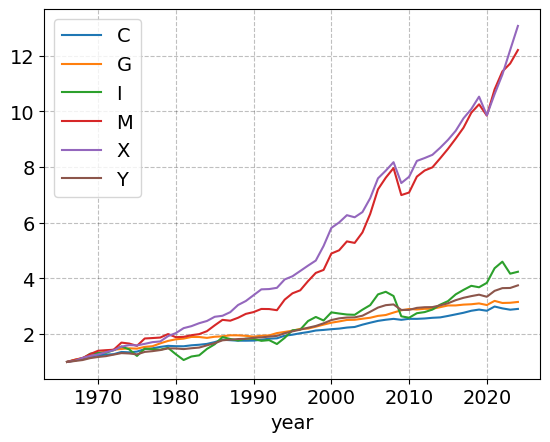

In [ ]:
# a. split
nah1_true_grouped = nah1_true.groupby(['variable','unit'])
nah1_true_grouped_first = nah1_true_grouped.value.first()
nah1_true_grouped_first.name = 'first'

# # b. apply
nah1_true = nah1_true.set_index(['variable','unit','year'])
nah1_true = nah1_true.join(nah1_true_grouped_first,how='left',on=['variable','unit'])
nah1_true = nah1_true.reset_index()

# # c. combine
nah1_true['indexed'] = nah1_true['value']/nah1_true['first']

# d. plot
def plot(df,variable='indexed'):
    df_indexed = df.set_index('year')
    I = df_indexed.unit == 'real'
    df_indexed[I].groupby(['variable'])[variable].plot(legend=True);
    
plot(nah1_true)

**Question:** Implement the same split-apply-combine as above using `transform`.

Used ChatGPT - if that is not visible:

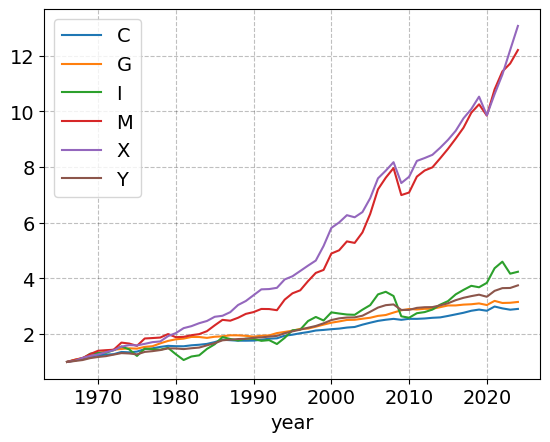

In [33]:
# Define a helper function that returns the first element of a pandas Series
# Used to get the first value within each group (e.g., the first time point or reference observation)
def first(x):
    return x.iloc[0]

# Create a copy of the original DataFrame to avoid modifying the original 'nah1_true'
nah1_true_alt = nah1_true.copy()

# Group the data by 'variable' and 'unit'
#   - 'variable' might represent a measurement type (e.g., GDP, population)
#   - 'unit' might represent countries, regions, or other entities
grouped = nah1_true_alt.groupby(['variable', 'unit'])

# Create a new column 'index_transform' where:
#   - For each group ('variable', 'unit'), divide every value in 'value' 
#     by the first value of that group (using the 'first' function above)
#   - This effectively normalizes each group's data so that the first value = 1
nah1_true_alt['index_transform'] = grouped['value'].transform(lambda x: x / first(x))

# Display the first few rows of the transformed DataFrame
nah1_true_alt.head()

# Plot the transformed data using a custom plotting function (defined elsewhere)
#   - variable='index_transform' means it plots the normalized values instead of raw ones
plot(nah1_true_alt, variable='index_transform')